# Data Drift Test Notebook for Tabular Data

This notebook implements a series of tests and measures to determine drift between a baseline and production dataset. Drift is measured via statistical comparisons of individual 

### Features 
- Automatic bin size selection for continous features based on sample size.


### Unit Tests
- Assert that no drift measures are minimal for datasets taken from the same distribution.
- Assert that drift measures are independent of sample size.
- Assert that metrics are defined in such a way that the same threshold works for featrures, independent of their value range.
- Assert that PSI metric does not blow up to infinity when a bin has a 0 count.

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.stats import ks_2samp
from utils import ( 
                    numerical_data_distribution_plot, 
                    categorical_grouped_bar_plot, 
                    jensen_shannon_distance_numerical, 
                    jensen_shannon_distance_categorical, 
                    normed_wasserstein_distance_numerical,
             )
from yaml import safe_load
config = safe_load(open('config.yml','rb'))

### Numerical Data

In [25]:
observations = 100_000
w = np.random.normal(50, 15, int(observations/100)) # identical with x
x = np.random.normal(50, 15, observations) # reference
y = np.random.normal(51, 17, int(observations/10)) # minor drift
z = np.random.normal(62, 20, int(observations/1000)) # major drift 

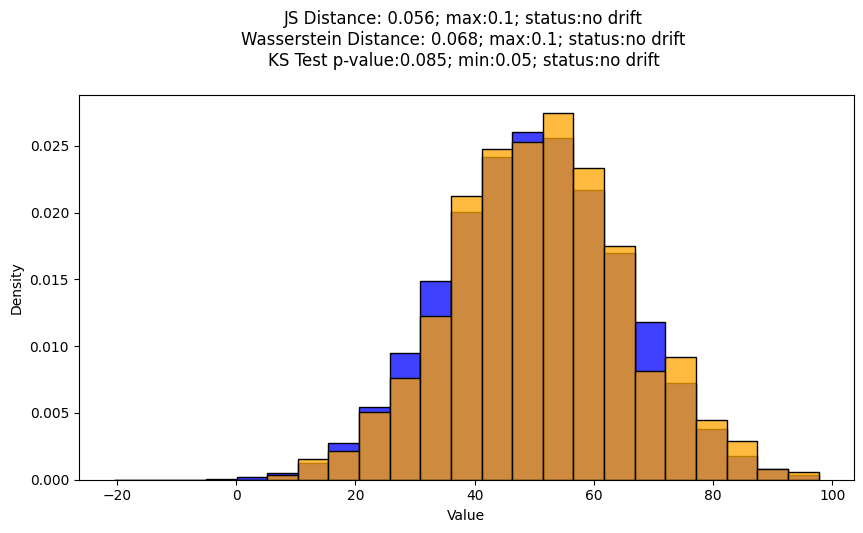

In [26]:
g = numerical_data_distribution_plot(x, w)

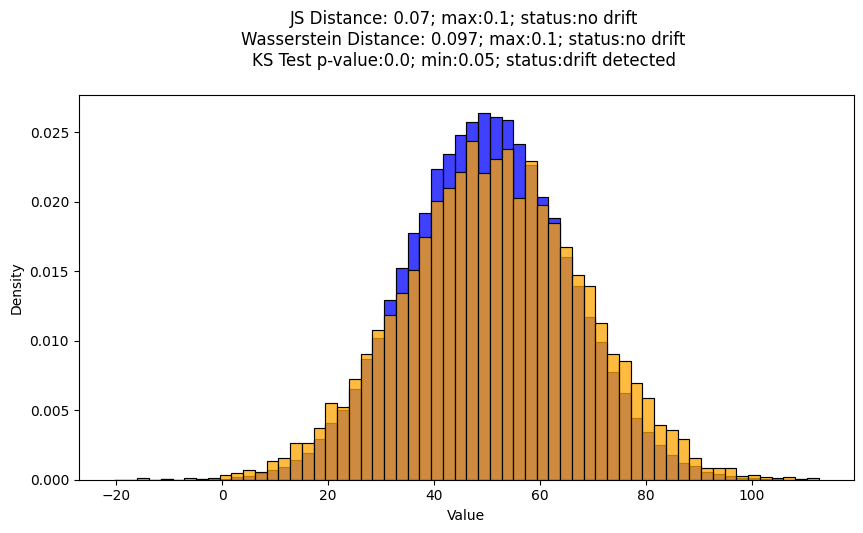

In [27]:
g = numerical_data_distribution_plot(x, y)


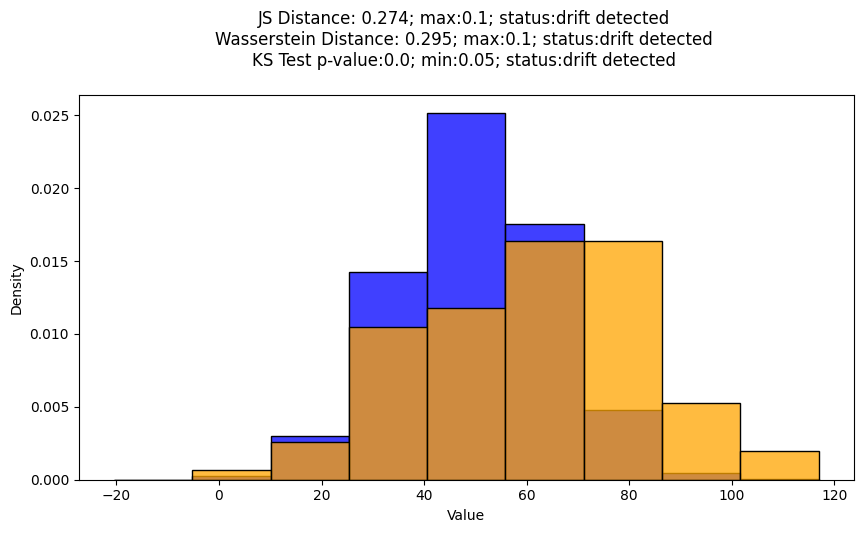

In [28]:
g = numerical_data_distribution_plot(x, z)

### Categorical Data

In [29]:
# Sample strings to generate categorical variables: a and b differ slightly. Strong difference between a versus c
a=('a'* 100 + 
   'b'* 100 + 
   'c'* 100 + 
   'd'* 100 + 
   'e'* 100 + 
   'f'* 100 + 
   'g'* 100 + 
   'h'* 100)

b=('a'* 97 + 
   'b'* 105 + 
   'c'* 99 + 
   'd'* 98 + 
   'e'* 101 + 
   'f'* 102 + 
   'g'* 97 + 
   'h'* 103)

c=('a'* 10 + 
   'b'* 11 + 
   'c'* 9 + 
   'd'* 10 + 
   'e'* 10 + 
   'f'* 10 + 
   'g'* 13 + 
   'h'* 10)

d=('a'* 180 + 
   'b'* 80 + 
   'c'* 70 + 
   'd'* 170 + 
   'e'* 200 + 
   'f'* 10 + 
   'g'* 130 + 
   'h'* 100)


e=('a'* 100 + 
   'b'* 100 + 
   'c'* 100 + 
   'd'* 100 + 
   'e'* 100 + 
   'f'* 100 + 
   'g'* 100  
)

# convert to lists
a_list = [letter for letter in a]
b_list = [letter for letter in b]
c_list = [letter for letter in c]
d_list = [letter for letter in d]
e_list = [letter for letter in e]

# shuffle lists
random.shuffle(a_list)
random.shuffle(b_list)
random.shuffle(c_list)
random.shuffle(d_list)
random.shuffle(e_list)

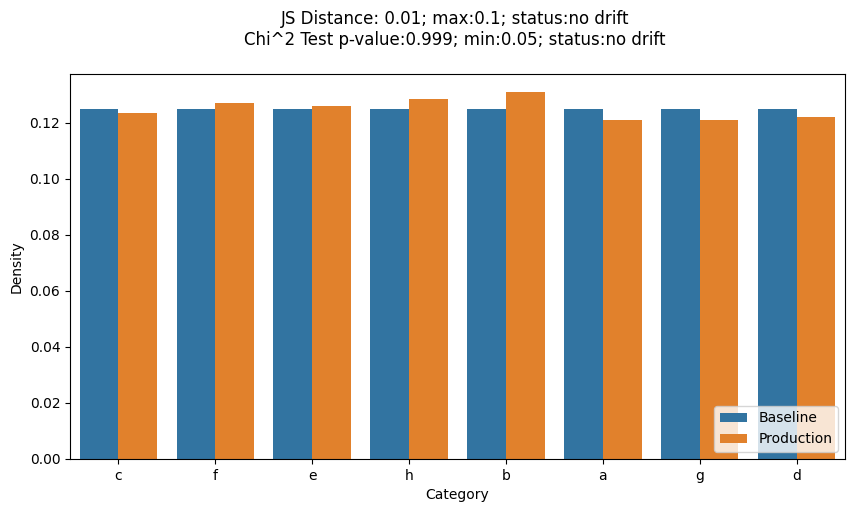

In [30]:
g = categorical_grouped_bar_plot(a_list, b_list)

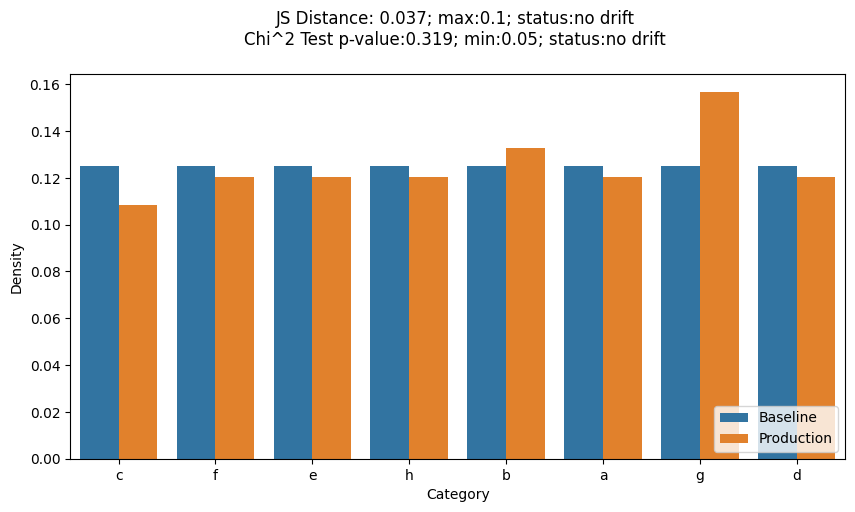

In [31]:
g = categorical_grouped_bar_plot(a_list, c_list)

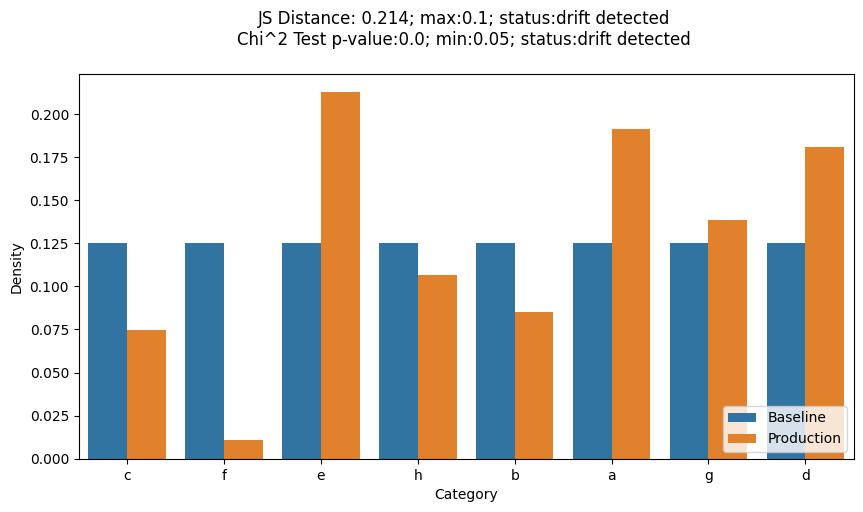

In [32]:
g = categorical_grouped_bar_plot(a_list, d_list)

/home/dpb/anaconda3/envs/data-drift-env/lib/python3.8/site-packages/scipy/stats/stats.py:5982: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


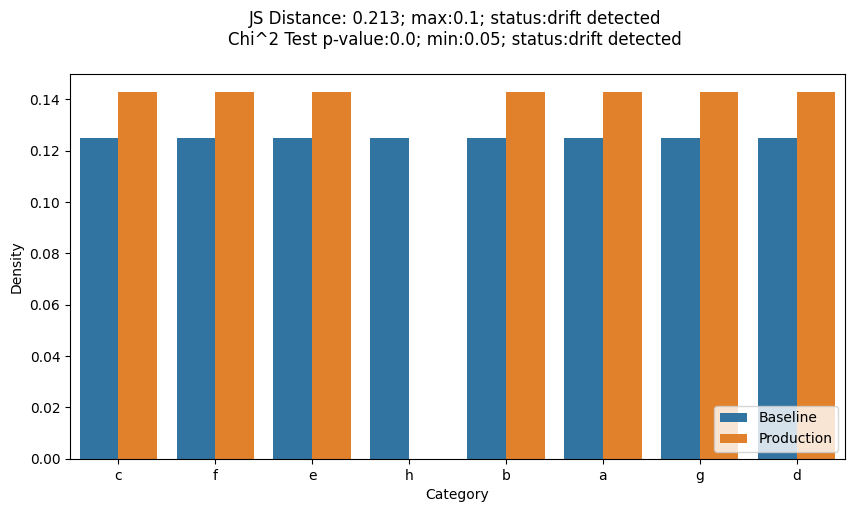

In [33]:
g = categorical_grouped_bar_plot(a_list, e_list)

In [34]:
sample_size = 100_000
x1 = np.random.normal(50, 15, sample_size) # reference
x10 = np.random.normal(50, 15, int(sample_size/10)) # reference
x100 = np.random.normal(50, 15, int(sample_size/100)) # reference

y1 = np.random.normal(62, 20, sample_size) # major drift 
y10 = np.random.normal(62, 20, int(sample_size/10)) # major drift 
y100 = np.random.normal(62, 20, int(sample_size/100)) # major drift 

def jsdn(x,y):
    return round(jensen_shannon_distance_numerical(x, y), config['significant_digits']) 

def nwdn(x,y):
    return round(normed_wasserstein_distance_numerical(x, y), config['significant_digits']) 


#Test 1: Drift distances shoud be close to 0 for identical distributions and different sample sizes
t1_jsd1 = jsdn(x1, x1)
t1_jsd10 = jsdn(x1, x10)
t1_jsd100 = jsdn(x1, x100)

t1_nwd1 = nwdn(x1, x1)
t1_nwd10 = nwdn(x1, x10)
t1_nwd100 = nwdn(x1, x100)

print("Test 1: Drift shoud be close to 0 for identical distributions and sample size invariant") 
print("Expected: (0,0,0)") 
print(f"JSD: ({t1_jsd1},{t1_jsd10},{t1_jsd100})")
print(f"NWD: ({t1_nwd1},{t1_nwd10},{t1_nwd100})")
print("")
# --------------------------------------------------------------------------------



#Test 2: Drift measure remain roughly for identical distributions of different sample sizes
t2_jsd1 = jsdn(x1, y1)
t2_jsd10 = jsdn(x1, y10)
t2_jsd100 = jsdn(x1, y100)

t2_nwd1 = nwdn(x1, y1)
t2_nwd10 = nwdn(x1, y10)
t2_nwd100 = nwdn(x1, y100)

print("Test 2: Drift measure remain roughly for identical distributions of different sample sizes") 
print("Expected: (a,a,a)") 
print(f"JSD: ({t2_jsd1},{t2_jsd10},{t2_jsd100})")
print(f"NWD: ({t2_nwd1},{t2_nwd10},{t2_nwd100})")
# --------------------------------------------------------------------------------

#Do the same for categorical variables

Test 1: Drift shoud be close to 0 for identical distributions and sample size invariant
Expected: (0,0,0)
JSD: (0.0,0.032,0.053)
NWD: (0.0,0.031,0.054)

Test 2: Drift measure remain roughly for identical distributions of different sample sizes
Expected: (a,a,a)
JSD: (0.264,0.259,0.268)
NWD: (0.222,0.217,0.2)
